In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#Import dependencies

In [2]:
df = pd.read_csv('slump_test.data')

#Get data

In [3]:
df.head()

#Look at dataframe

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df = df.drop(['No'],axis=1)

#Discard 'No' column

In [5]:
df.head()
#Check dataframe again

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df.info()

#Look at columns to see if any missing values and if data cleaning is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10)
memory usage: 8.2 KB


In [54]:
df.describe()

#View descriptive statistics of each column

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


# DBA 

Begin data exploration:


My first step was to look at the distrubition of the output variables. 

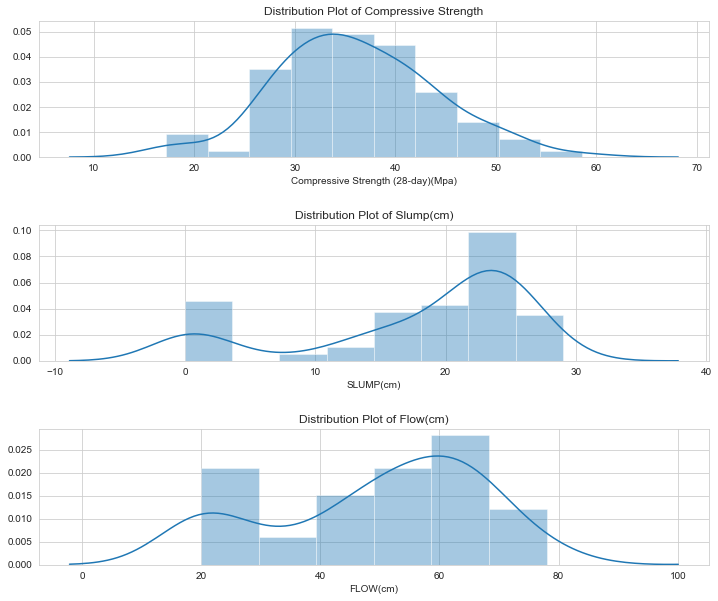

In [55]:
fig, ax = plt.subplots(3,1,figsize=(12,10))
fig.subplots_adjust(hspace=.5)

ax1 =  sns.distplot(df['Compressive Strength (28-day)(Mpa)'],ax=ax[0])
ax1.title.set_text('Distribution Plot of Compressive Strength')



ax2 = sns.distplot(df['SLUMP(cm)'],ax=ax[1])
ax2.title.set_text('Distribution Plot of Slump(cm)')

ax3 = sns.distplot(df['FLOW(cm)'],ax=ax[2])
ax3.title.set_text('Distribution Plot of Flow(cm)')

We can see that the compressive strength variable is normall distrubted, with most values falling withing the 30-40 range. 

With the Slump output, there is a skew towards values above 20cm. The Flow output has a high number of values withing the 20 to 30cm range, which coincides with other output columns having a spike on the lower end of the distribution. 

In [9]:
corr = df.corr()

In [57]:
corr

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Compressive Strength (28-day)(Mpa),0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


Create a simple correlation table on all of the variables

(10, 0)

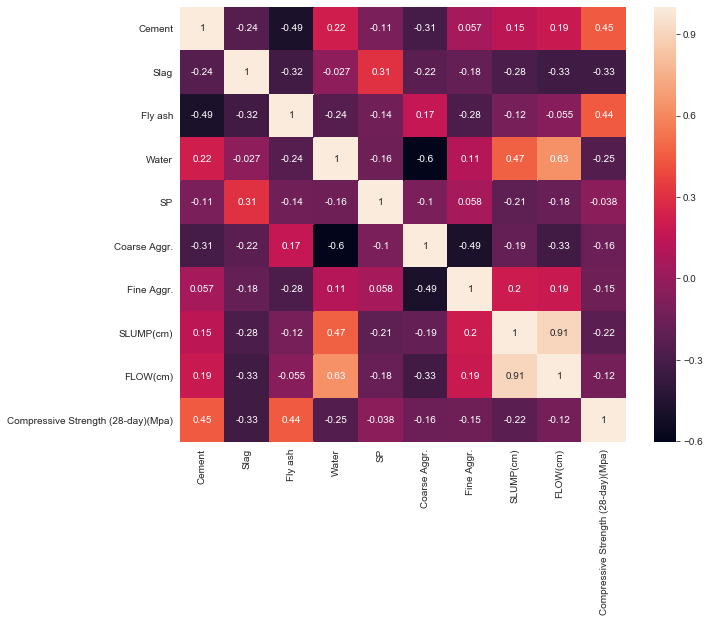

In [58]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(corr,annot=True)
ax.set_ylim(10, 0)

Heatmap visualization of all of the variables-lighter color means higher correlation, darker less correlation

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, -0.01, 'Water and Flow Regression')

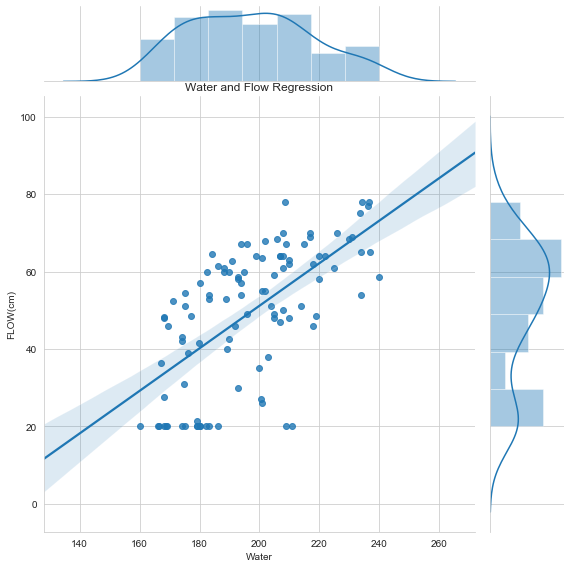

In [59]:
sns.jointplot('Water','FLOW(cm)',data=df,kind='reg',size=8,)
plt.title('Water and Flow Regression', y=-0.01, fontsize =12)


Regression between water and flow(cm) indicating a strong, positive relationship between water and flow(cm). 

Text(0.5, 1.0, 'Scatter Plot of Flow and Slump (cm)')

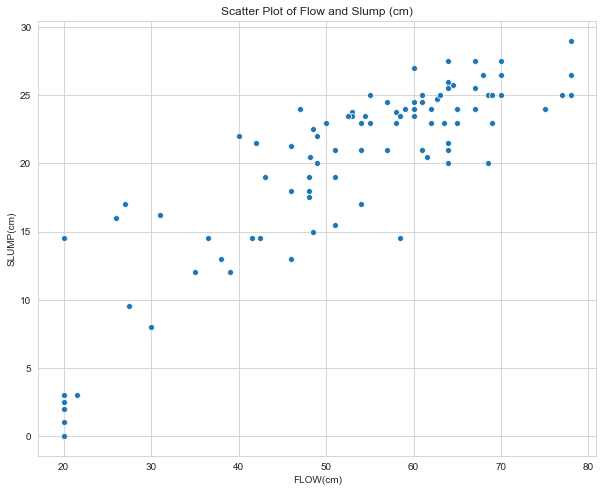

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="FLOW(cm)",y="SLUMP(cm)",data=df,)
plt.title('Scatter Plot of Flow and Slump (cm)')

Scatter plot visualization of Flow(cm) and Slump(cm). The values had a high correlation (> .9), so the visualization should tell us what we already know

Text(0.5, 1.0, 'Fly ash and Cement')

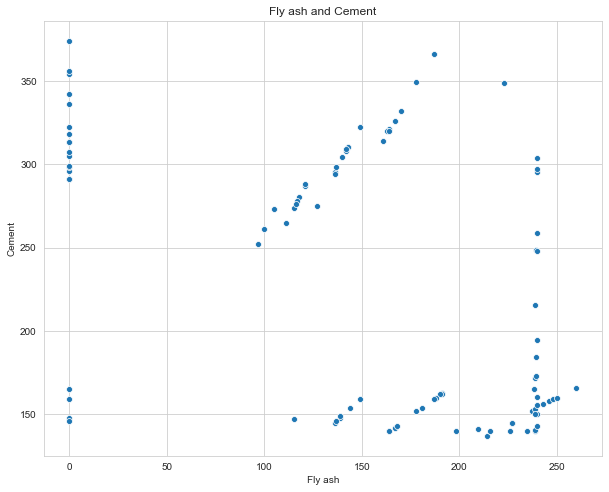

In [61]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Fly ash",y="Cement",data=df,)
plt.title('Fly ash and Cement')

Scatter plot visualization of Fly ash and Cement. There are several interesting insights that I noticed from the visualization:

1. There are a high number of values occupying the upper and lower boundaries of the distriibution for both axes. 
2. There seems to be a positive correlation between fly ash and cement but-
3. The values of fly ash and cement start to converge at the bottom right of the graph-making the correlation negative

In [62]:
df[(df['Fly ash']==0)|(df['Fly ash']>=230)].sort_values(by='Fly ash')
#Create a table of different fly ash values to see if there are any discernable patterns

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa),Bins
57,313.0,124.0,0.0,205.0,11.0,846.0,758.0,22.00,49.0,29.63,2
69,336.0,134.0,0.0,222.0,6.0,756.0,787.0,26.00,64.0,31.90,2
56,307.0,110.0,0.0,189.0,10.0,904.0,765.0,22.00,40.0,31.50,2
55,159.0,193.0,0.0,208.0,12.0,821.0,818.0,23.00,50.0,19.19,1
52,356.0,142.0,0.0,193.0,11.0,801.0,778.0,8.00,30.0,36.46,3
51,342.0,136.0,0.0,225.0,11.0,770.0,747.0,21.00,61.0,32.04,2
45,318.0,126.0,0.0,210.0,6.0,861.0,737.0,17.50,48.0,31.77,2
44,298.0,107.0,0.0,186.0,6.0,879.0,815.0,3.00,20.0,30.97,2
43,291.0,105.0,0.0,205.0,6.0,859.0,797.0,24.00,59.0,27.62,2
62,299.0,107.0,0.0,210.0,10.0,881.0,745.0,25.00,63.0,28.29,2


In [63]:
df[df['Fly ash']==0][['Cement']].mean()
#Mean of Fly ash with 0 value

Cement    286.65
dtype: float64

In [68]:
df[df['Fly ash']>=230][['Cement']].mean()
#Mean of Fly ash with value greater than 230

Cement    186.67037
dtype: float64

# Correlation between 28-day compressive strength (CS) and the seven input measurement features

In [65]:
corr['Compressive Strength (28-day)(Mpa)'].sort_values(ascending=False)
#Correlation between selected target variable

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445725
Fly ash                               0.444393
SP                                   -0.037871
FLOW(cm)                             -0.124029
Fine Aggr.                           -0.154484
Coarse Aggr.                         -0.160684
SLUMP(cm)                            -0.223358
Water                                -0.254235
Slag                                 -0.331588
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [66]:
df['Bins'] = pd.cut(df['Compressive Strength (28-day)(Mpa)'],5,labels=["1","2","3","4","5"])
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa),Bins
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99,3
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14,3
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81,3
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08,4
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82,2


Create 5 bins for Compressive Strength variable

Text(0.5, 1.0, 'Relationship Between Compressive Strength (in 5 categories) and Cement')

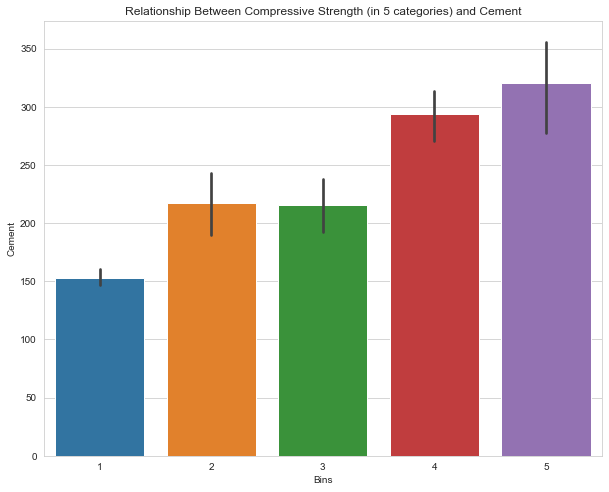

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x="Bins",y="Cement",data=df,)
plt.title('Relationship Between Compressive Strength (in 5 categories) and Cement')

Simple bar graph visualization between Compressive Strength category and Cement value. It seems that that with a higher cement value translate to higher category of Compressive strength

In [69]:
from scipy.stats import pearsonr
corr_pval = pearsonr(df['Cement'],df['Compressive Strength (28-day)(Mpa)'])
print ('The correlation coeffeficient and p-value is {}'.format(corr_pval))

The correlation coeffeficient and p-value is (0.44572481283540655, 2.379445178426516e-06)


Statistical analysis confirms the positive relationship and that it is significant. Higher amounts of cement mean that the overall compressive strenght will be greater.

# Decision tree model 

In [22]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split# Import train_test_split function
from sklearn.metrics import mean_squared_error #Import mse calculation
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree #Import tree visualization

In [70]:
Xdt = df[['Cement','Fly ash']]
ydt = df[['Bins']].astype(int)

# Seperate target variable from input
# The input values were taken from the columns that had the highest correlation.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Xdt, ydt, test_size=0.3, random_state=1)
#Train test split

In [72]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Train on test values and make a prediction

In [74]:
mse = mean_squared_error(y_test,y_pred)
acc_score = metrics.accuracy_score(y_test, y_pred)

print("The MSE is {} and the accuracy score is {}".format(mse,acc_score))


The MSE is 0.3870967741935484 and the accuracy score is 0.6129032258064516


On our first simple decision tree model- the MSE is somewhat high. A higher MSE means that there was more error in the predicted values from the actual values. The accuracy score is also telling us that about 61% of values were accruately predicted in this model

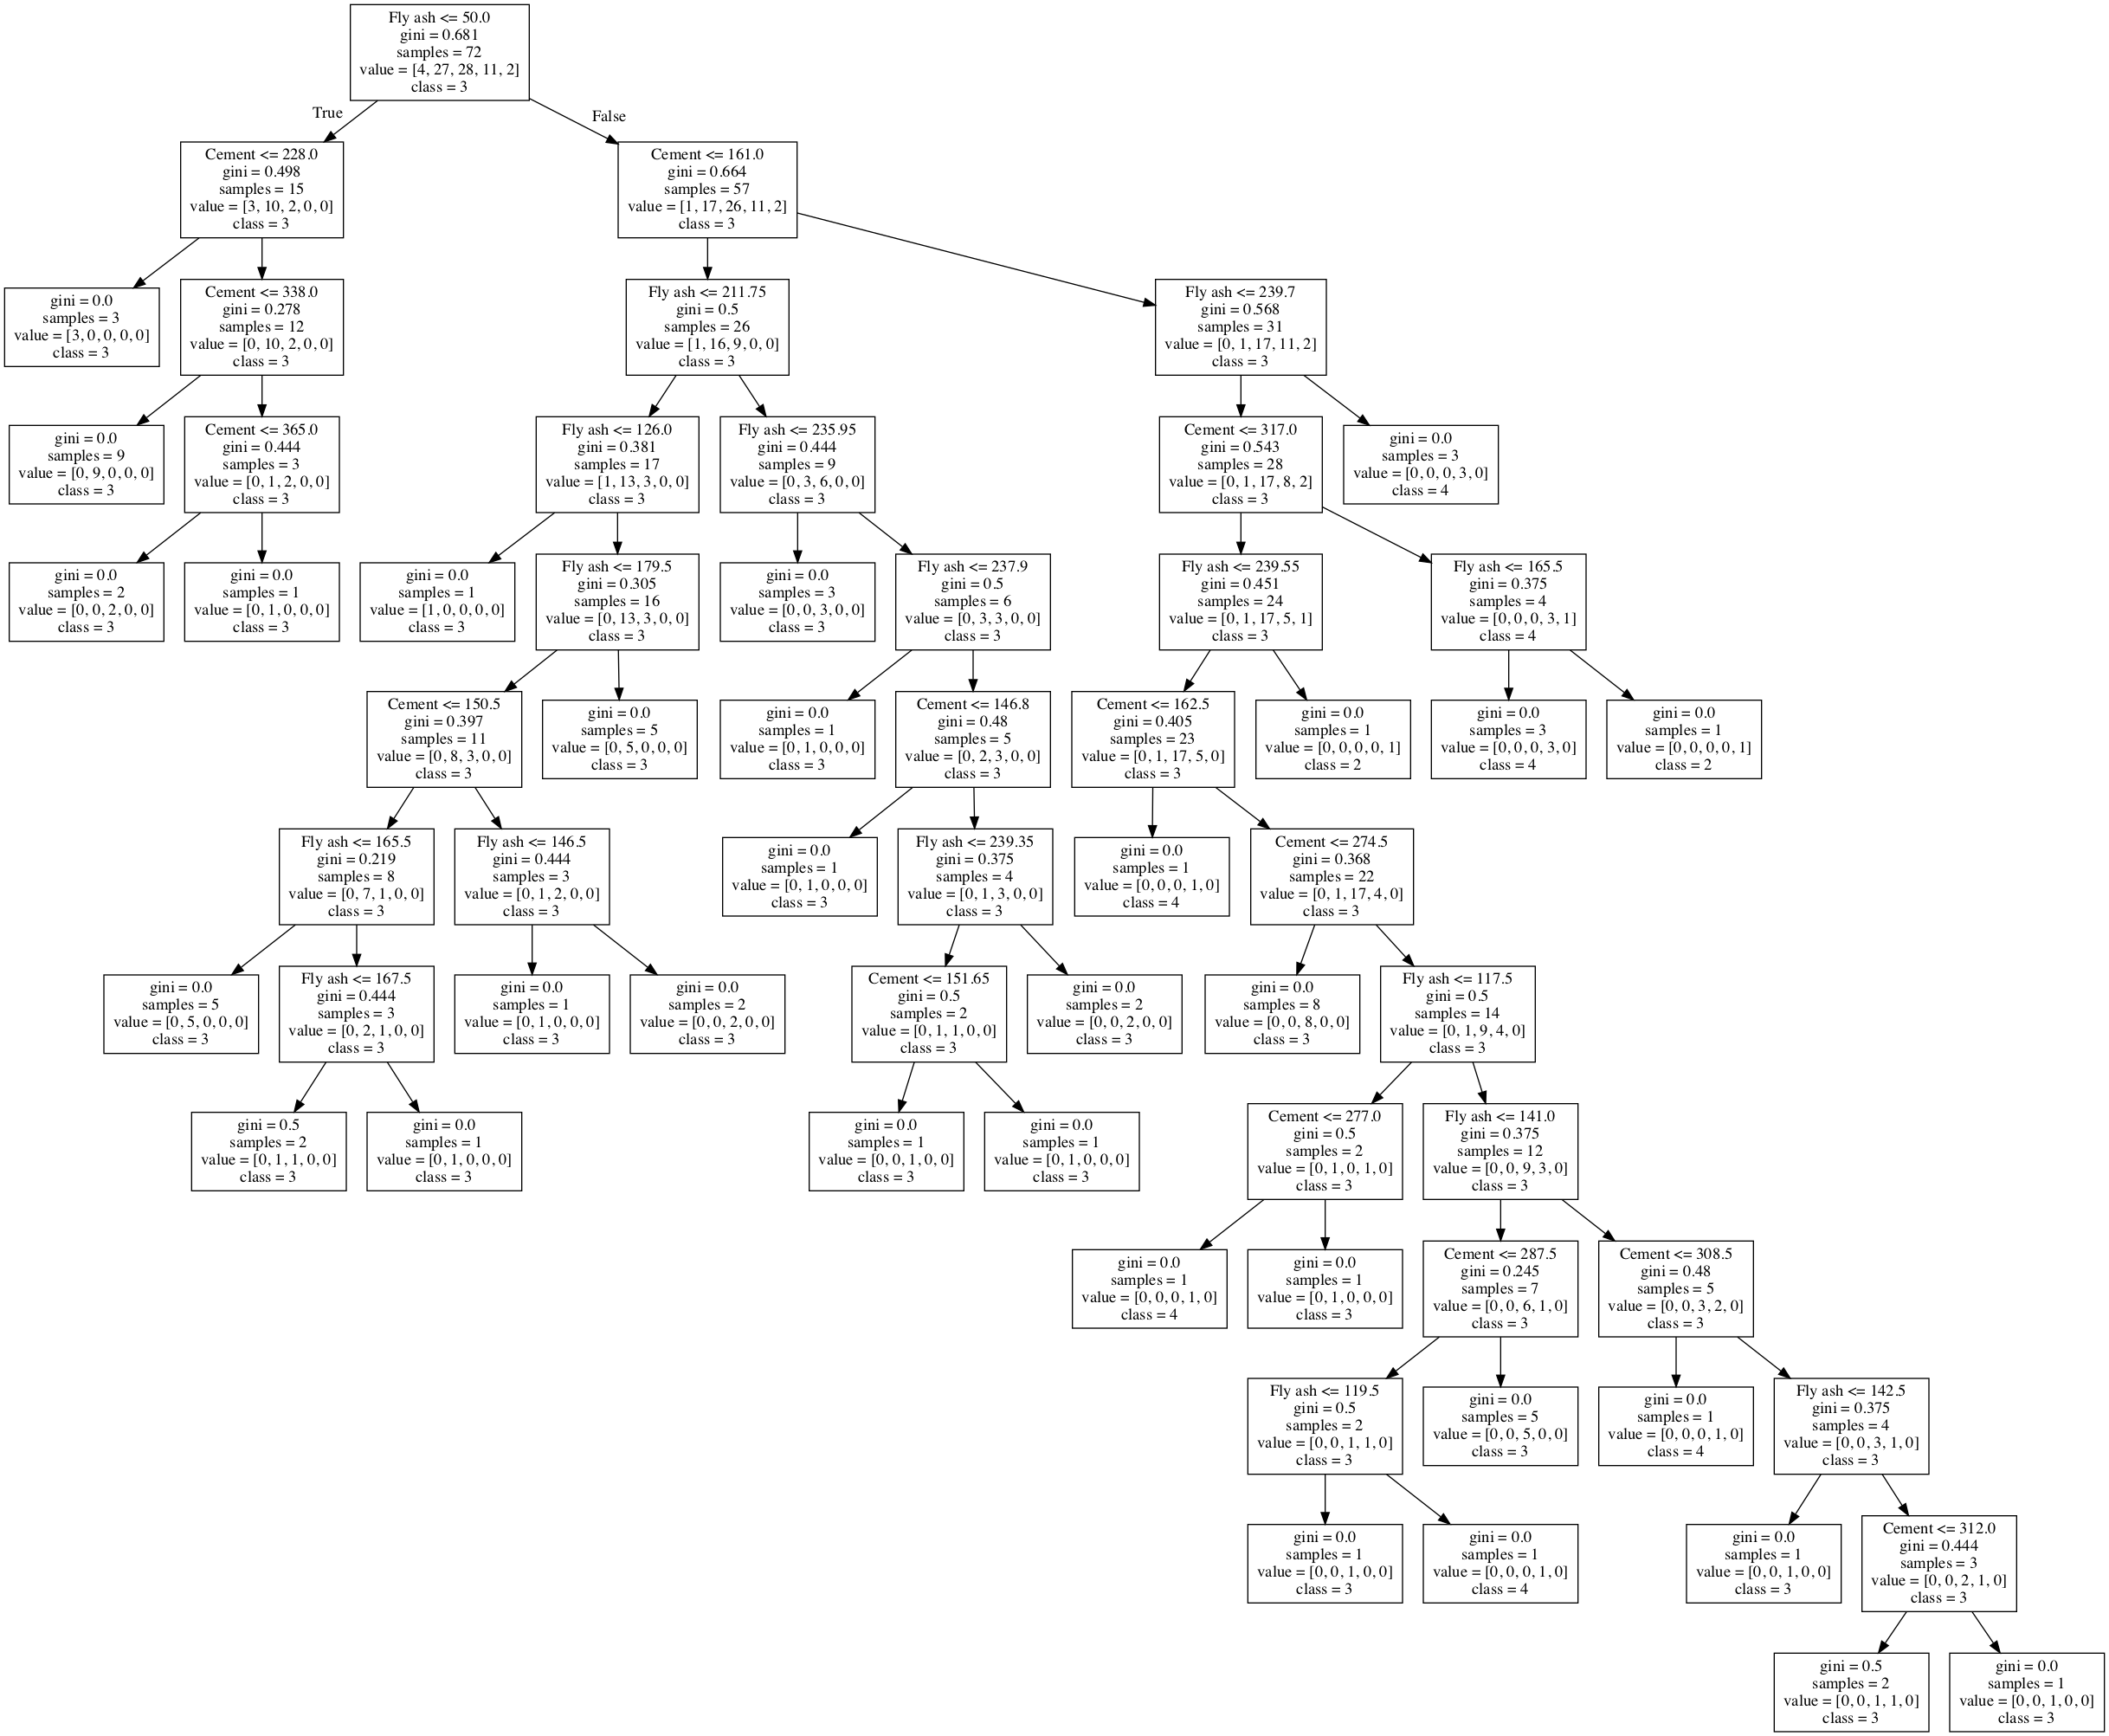

In [75]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['Cement','Fly ash'],  
                                class_names=df['Bins'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Decision tree visualization. Each stem represents a way that the model segmented the data

# Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X = df.iloc[:,:-2]
y = df['Bins']


scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=101)

mse_values = []
acc_values = []

for i in range(1,32):
    
    
    
    
    rfc = RandomForestClassifier(n_estimators=100, max_depth=i,random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    mse = mean_squared_error(y_test,y_pred)
    acc_score = metrics.accuracy_score(y_test, y_pred)
    
    mse_values.append(mse)
    acc_values.append(acc_score)
    
    print("The MSE is {} and the accuracy score is {} with max_depth {}".format(mse,acc_score, i))
    

The MSE is 0.5806451612903226 and the accuracy score is 0.5161290322580645 with max_depth 1
The MSE is 0.45161290322580644 and the accuracy score is 0.6451612903225806 with max_depth 2
The MSE is 0.5161290322580645 and the accuracy score is 0.5806451612903226 with max_depth 3
The MSE is 0.45161290322580644 and the accuracy score is 0.6451612903225806 with max_depth 4
The MSE is 0.3548387096774194 and the accuracy score is 0.6451612903225806 with max_depth 5
The MSE is 0.3870967741935484 and the accuracy score is 0.6129032258064516 with max_depth 6
The MSE is 0.45161290322580644 and the accuracy score is 0.6451612903225806 with max_depth 7
The MSE is 0.3548387096774194 and the accuracy score is 0.6451612903225806 with max_depth 8
The MSE is 0.3548387096774194 and the accuracy score is 0.6451612903225806 with max_depth 9
The MSE is 0.3225806451612903 and the accuracy score is 0.6774193548387096 with max_depth 10
The MSE is 0.45161290322580644 and the accuracy score is 0.6451612903225806 

This model trains on several depths using a for loop and then prints out the MSE and accuracy score for each value.

In [77]:
print(min(mse_values),max(acc_values))
# Print out the best values for MSE and accuracy score-optimal max depth is either 10 or 25-27.

0.2903225806451613 0.7096774193548387


In [78]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()
selected = X.columns[(sel.get_support())]
print(selected)

Index(['Cement', 'Slag', 'Fly ash', 'Water'], dtype='object')


The feature selection from sklearn tells us which features were the most singificant in predicting the target variable, which we then later use to train our model on.

In [79]:
Xnew = df[selected]
new_scaler = StandardScaler().fit(Xnew)
new_X_scaled = new_scaler.transform(Xnew)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

rfc_new = RandomForestClassifier()
rfc_new.fit(X_train,y_train)
new_preds = rfc_new.predict(X_test)
# Train model on just selected features

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
mse_n = mean_squared_error(y_test,y_pred)
acc_score_n = metrics.accuracy_score(y_test, y_pred)

print('The MSE and accuracy score with the features selected are {} and {}'.format(mse_n,acc_score_n))

The MSE and accuracy score with the features selected are 0.3548387096774194 and 0.6451612903225806


Using the model based on the selected features, gives us the above MSE and accuracy values. This model did not perform better than the ones used earlier on all of the features. 

# Final Thoughts

1. The other methods that I would like to explore would be to use a linear regression model and the XGBoost Classifier to train my model on. This would allow me to see if different approaches would lead to better predictions.

2. There could be some interesting feature engineering that could be done, specifically with the Cement, Fly ash, and water features. 

3. Browsing through the data, I think there was some interesting findings with respect to some of the features having uneven distributions. If there was other data that could be collected explaining those values, I think that would be useful in further analysis.

4. Based off the exploratory research, I would use this data to reccomend that the best predictors for Compressive Strength are Fly ash and Cement, as well as Slag and Water indicate lower Compressive Strength. 